# setup

In [7]:
from abc import ABC, abstractmethod
from typing import List, Optional, Union
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'

# functions

In [3]:
from abc import ABC, abstractmethod
from typing import List, Optional, Union
import numpy as np
import pandas as pd

class Model(ABC):
    @abstractmethod
    def fit(self, X, y):
        pass

    @abstractmethod
    def predict(self, X):
        pass


class Perceptron(Model):
    """
    perceptron according to https://classroom.google.com/u/2/w/Njg4MzMyOTYxNzU0/t/all, p.20
    """
    def __init__(self):
        self.weights = np.array([])
        self.epochs = 0
        self.errors = list()

    def sign(self, u: float) -> int:
        if u >= 0:
            return 1
        else:
            return -1

    def fit(
            self,
            x: np.ndarray, 
            y: np.ndarray,
            learning_rate: float = 1e-1,
            num_epochs: int = 100,
            seed: Optional[int] = 0
        ) -> Union[np.ndarray, int, List[float]]:
        """
        this is the train function required by https://classroom.google.com/u/2/w/Njg4MzMyOTYxNzU0/t/all
        
        inputs:
            X: input data
            y: target data
            learning_rate: learning rate
            num_epochs: number of epochs
            seed: random seed
        
        outputs:
            weights: np.ndarray
            epochs: int
            errors: List[float]

        """
        np.random.seed(seed)
        n_samples, n_features = x.shape
        self.weights = np.random.rand(n_features + 1) * 1e-3
        self.errors = list()
        epoch = 0
        while (epoch < num_epochs):
            error = False
            errors_per_sample = 0
            for i in range(n_samples):
                u = np.dot(
                    self.weights,
                    np.insert(x[i], 0, 1.0)
                )
                y_hat = self.sign(u)
                if y_hat != y[i]:
                    self.weights += learning_rate * (y[i] - y_hat) * np.insert(x[i], 0, 1.0)
                    error = True
                    errors_per_sample += 1/n_samples
            self.errors.append(errors_per_sample)
            epoch += 1
            if not error:
                break
        self.epochs = epoch
        return self.weights, self.epochs, self.errors
                

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        this is the train function required by https://classroom.google.com/u/2/w/Njg4MzMyOTYxNzU0/t/all

        inputs:
            x: input data

        outputs:
            predictions: np.ndarray
            accuracy: float
        """
        if len(self.weights) == 0:
            raise ValueError("Model has not been fitted yet.")
        n_samples = x.shape[0]
        pred = np.zeros(n_samples)
        for i in range(n_samples):
            u = np.dot(self.weights, np.insert(x[i], 0, 1.0))
            pred[i] = self.sign(u)
        return pred

# experiments

## dataset 1

In [4]:
i = 1
train = pd.read_csv(f"../data/atividade_01/train_dataset{i}.csv")
test = pd.read_csv(f"../data/atividade_01/test_dataset{i}.csv")
display(train.head())
display(test.head())

,x1,x2,label
0,0.254018,-0.402391,-1
1,0.180883,0.510887,1
2,0.227152,0.467715,1
3,-0.122832,0.502635,1
4,0.437193,-0.579592,-1


,x1,x2,label
0,0.161340,0.556115,1
1,0.020548,0.372505,1
2,-0.569569,0.546234,1
3,0.995911,-0.126522,-1
4,0.908252,0.967564,1


In [17]:
model = Perceptron()

X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

weights, epochs, errors = model.fit(
    X_train,
    y_train,
    num_epochs=100,
    learning_rate=0.1
)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

accuracy_train = np.mean(pred_train == y_train)
accuracy_test = np.mean(pred_test == y_test)

print(f"train acc : {accuracy_train:.2f}")
print(f"test acc  : {accuracy_test:.2f}")

train acc : 0.96
test acc  : 0.93


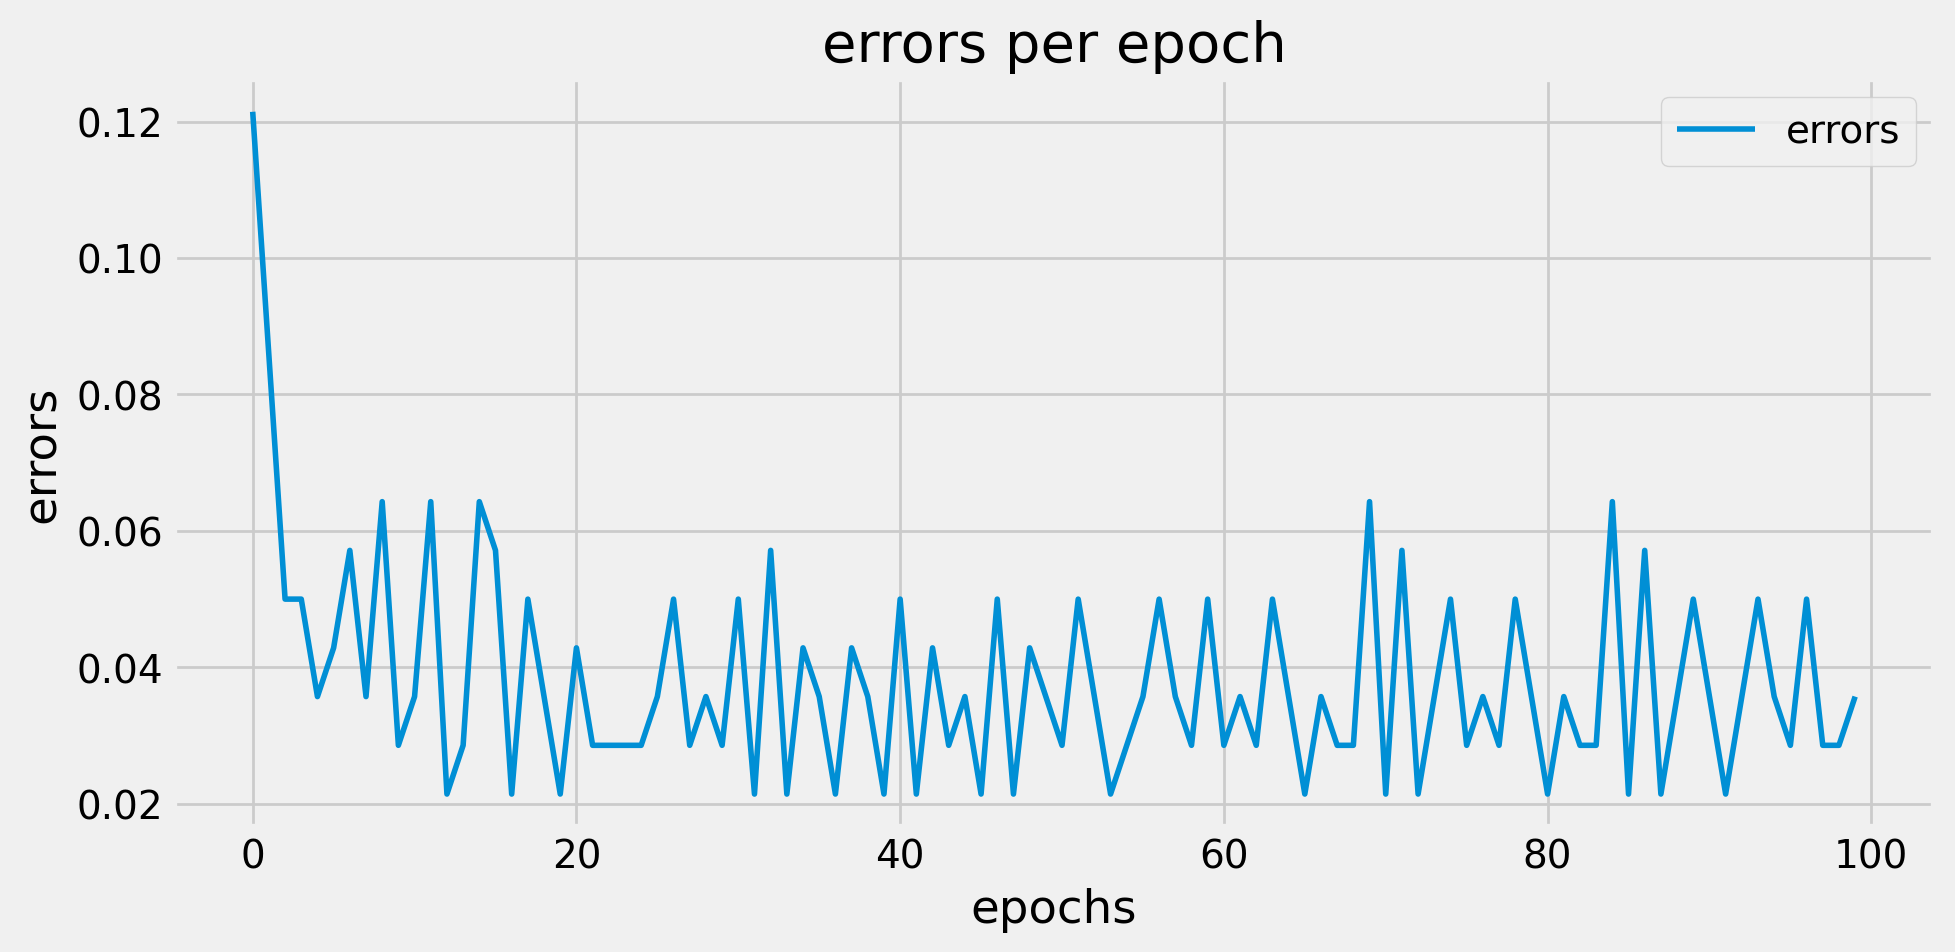

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(errors, label="errors", linewidth=2)
plt.xlabel("epochs")
plt.ylabel("errors")
plt.title("errors per epoch")
plt.legend()
plt.tight_layout()
plt.show()

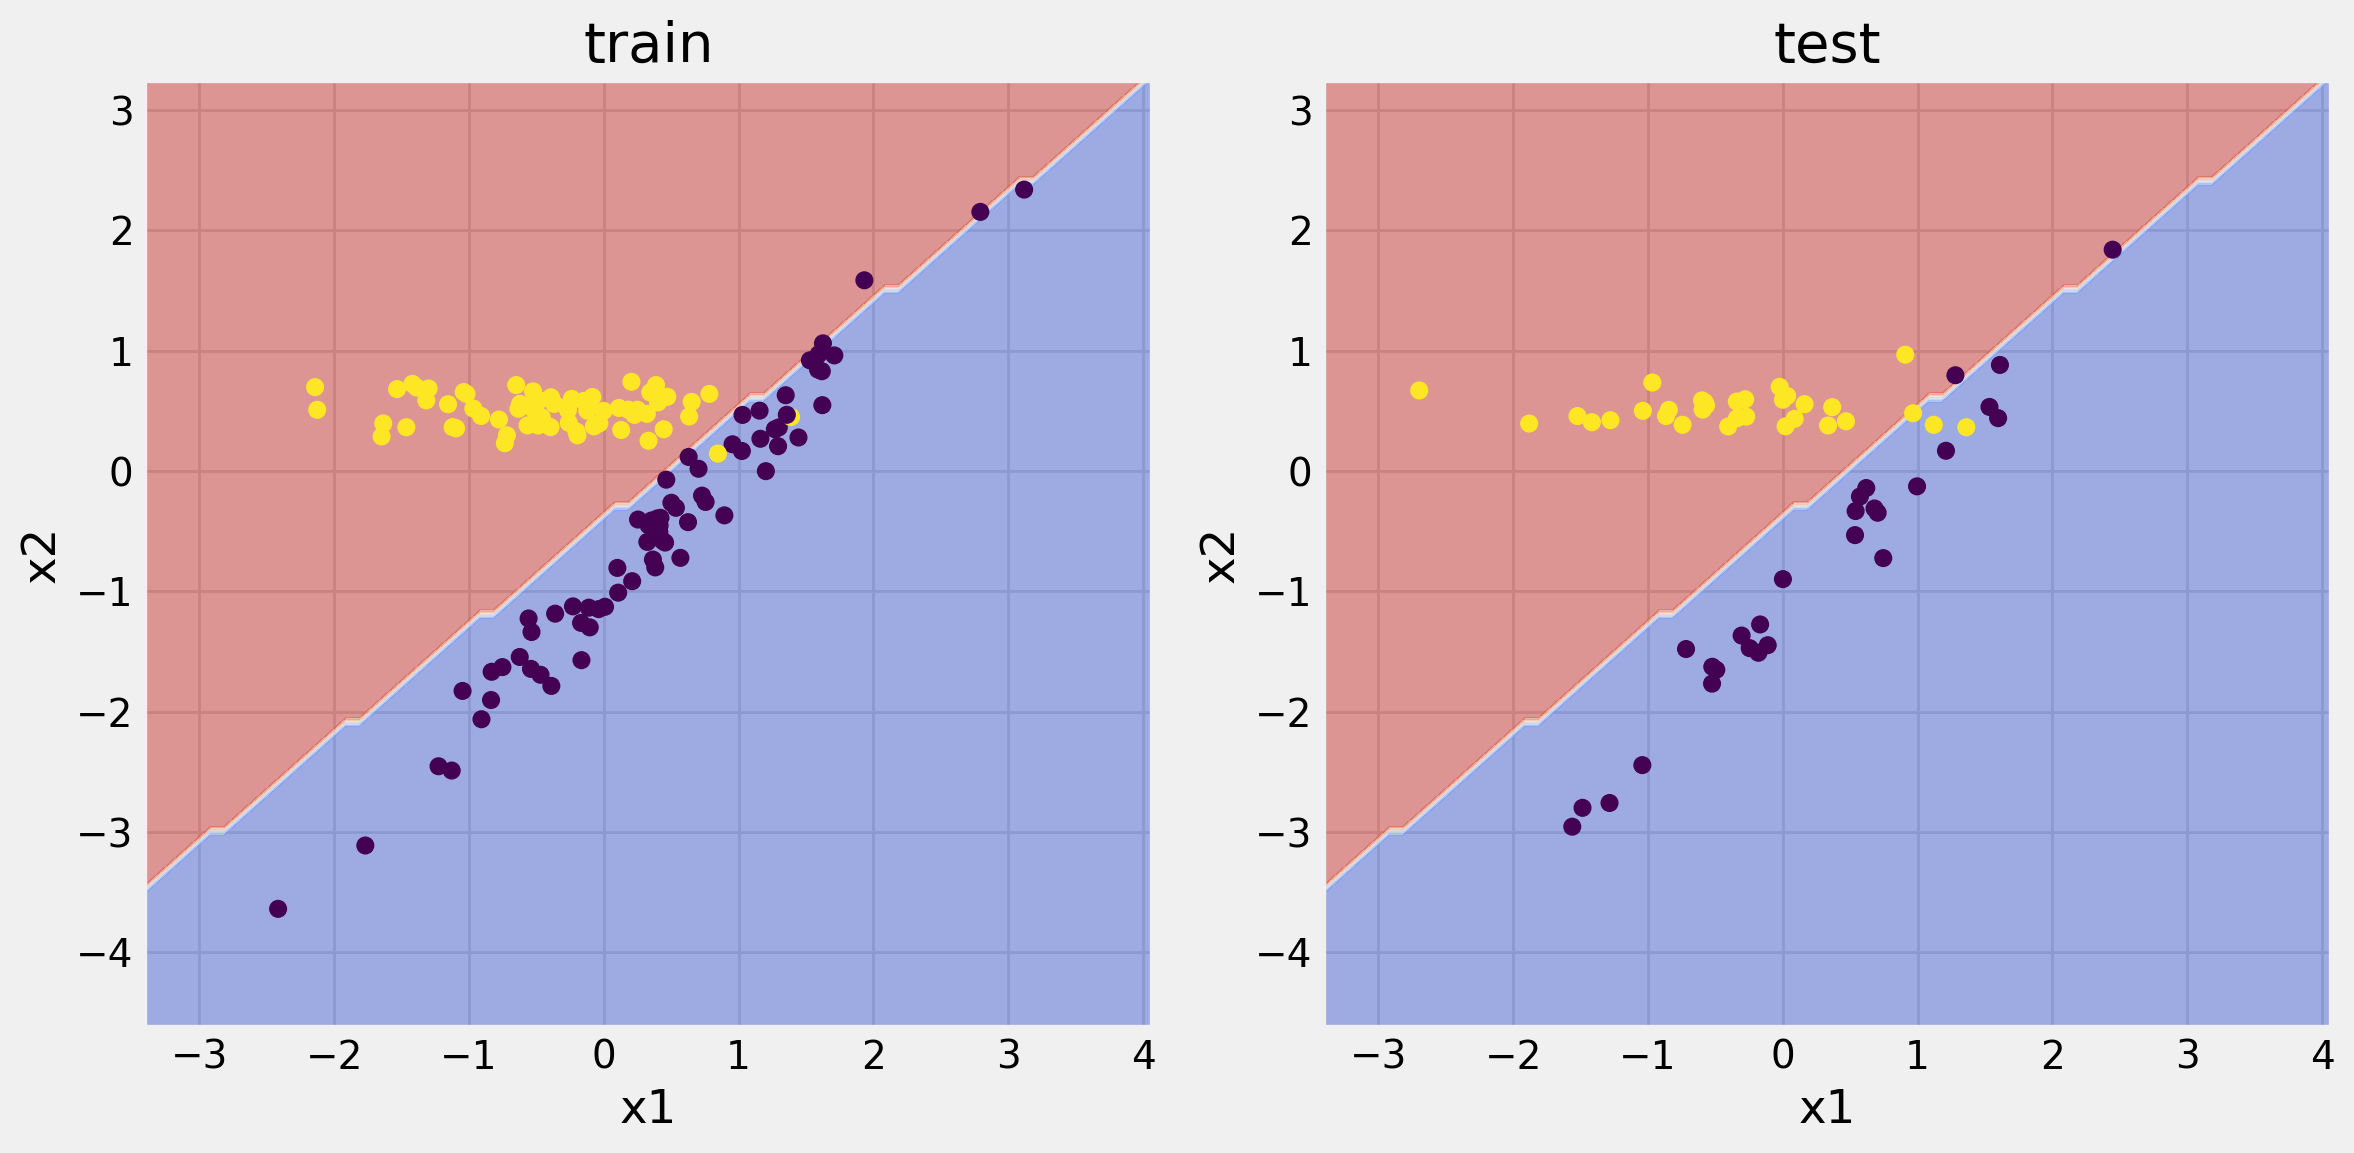

In [35]:
# decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1)
)
zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

f, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].contourf(xx, yy, zz, alpha=0.5, cmap='coolwarm')
axs[0].scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    marker='o',
)
axs[0].set_title("train")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")
axs[1].contourf(xx, yy, zz, alpha=0.5, cmap='coolwarm')
axs[1].scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test,
)
axs[1].set_title("test")
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")
plt.tight_layout()
plt.show()

In [36]:
weights

array([ 0.60054881, -1.32020847,  1.46739954])

**comentários**

à medida que os pesos são atualizados ao longo das épocas, os pesos "aprendem uma relação linear", inclusive se $$u = \sum_{i}w_{i}x_{i} - \theta$$, então é possível reescrever como $$x_2 = -\frac{w_1 x_1}{w_2} -\frac{\theta + C}{w_2}$$, como $w_1 < 0$ e $w_2 > 0$ então o coeficiente angular aprendido é positivo e a curva aprendida é uma reta.

## dataset 2

In [38]:
i = 2
train = pd.read_csv(f"../data/atividade_01/train_dataset{i}.csv")
test = pd.read_csv(f"../data/atividade_01/test_dataset{i}.csv")
display(train.head())
display(test.head())

,x1,x2,label
0,-0.882159,-0.511697,-1
1,0.056971,0.101538,1
2,0.987759,-0.000616,-1
3,1.108407,0.017528,-1
4,-0.555163,0.770001,-1


,x1,x2,label
0,-0.141852,0.102203,1
1,0.134028,-1.027246,-1
2,0.171773,-0.896942,-1
3,0.071050,-0.193340,1
4,-0.829970,0.547396,-1


In [39]:
model = Perceptron()

X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

weights, epochs, errors = model.fit(
    X_train,
    y_train,
    num_epochs=100,
    learning_rate=0.1
)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

accuracy_train = np.mean(pred_train == y_train)
accuracy_test = np.mean(pred_test == y_test)

print(f"train acc : {accuracy_train:.2f}")
print(f"test acc  : {accuracy_test:.2f}")

train acc : 0.54
test acc  : 0.45


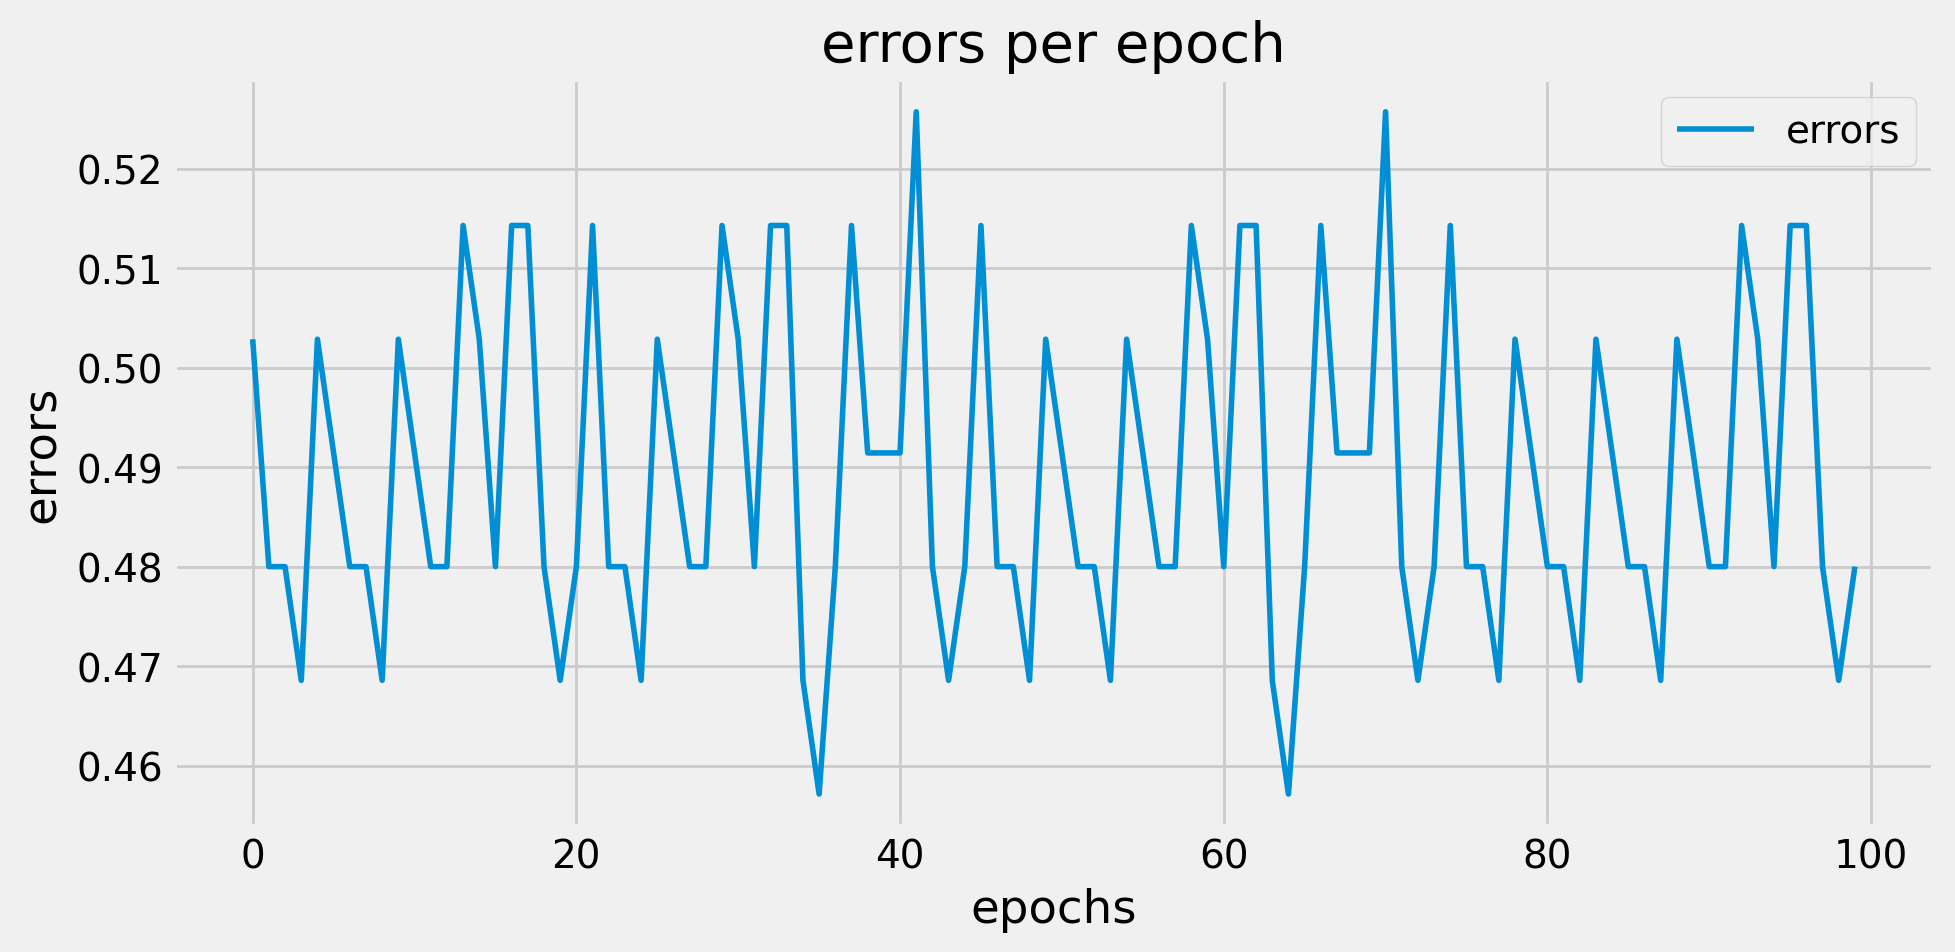

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(errors, label="errors", linewidth=2)
plt.xlabel("epochs")
plt.ylabel("errors")
plt.title("errors per epoch")
plt.legend()
plt.tight_layout()
plt.show()

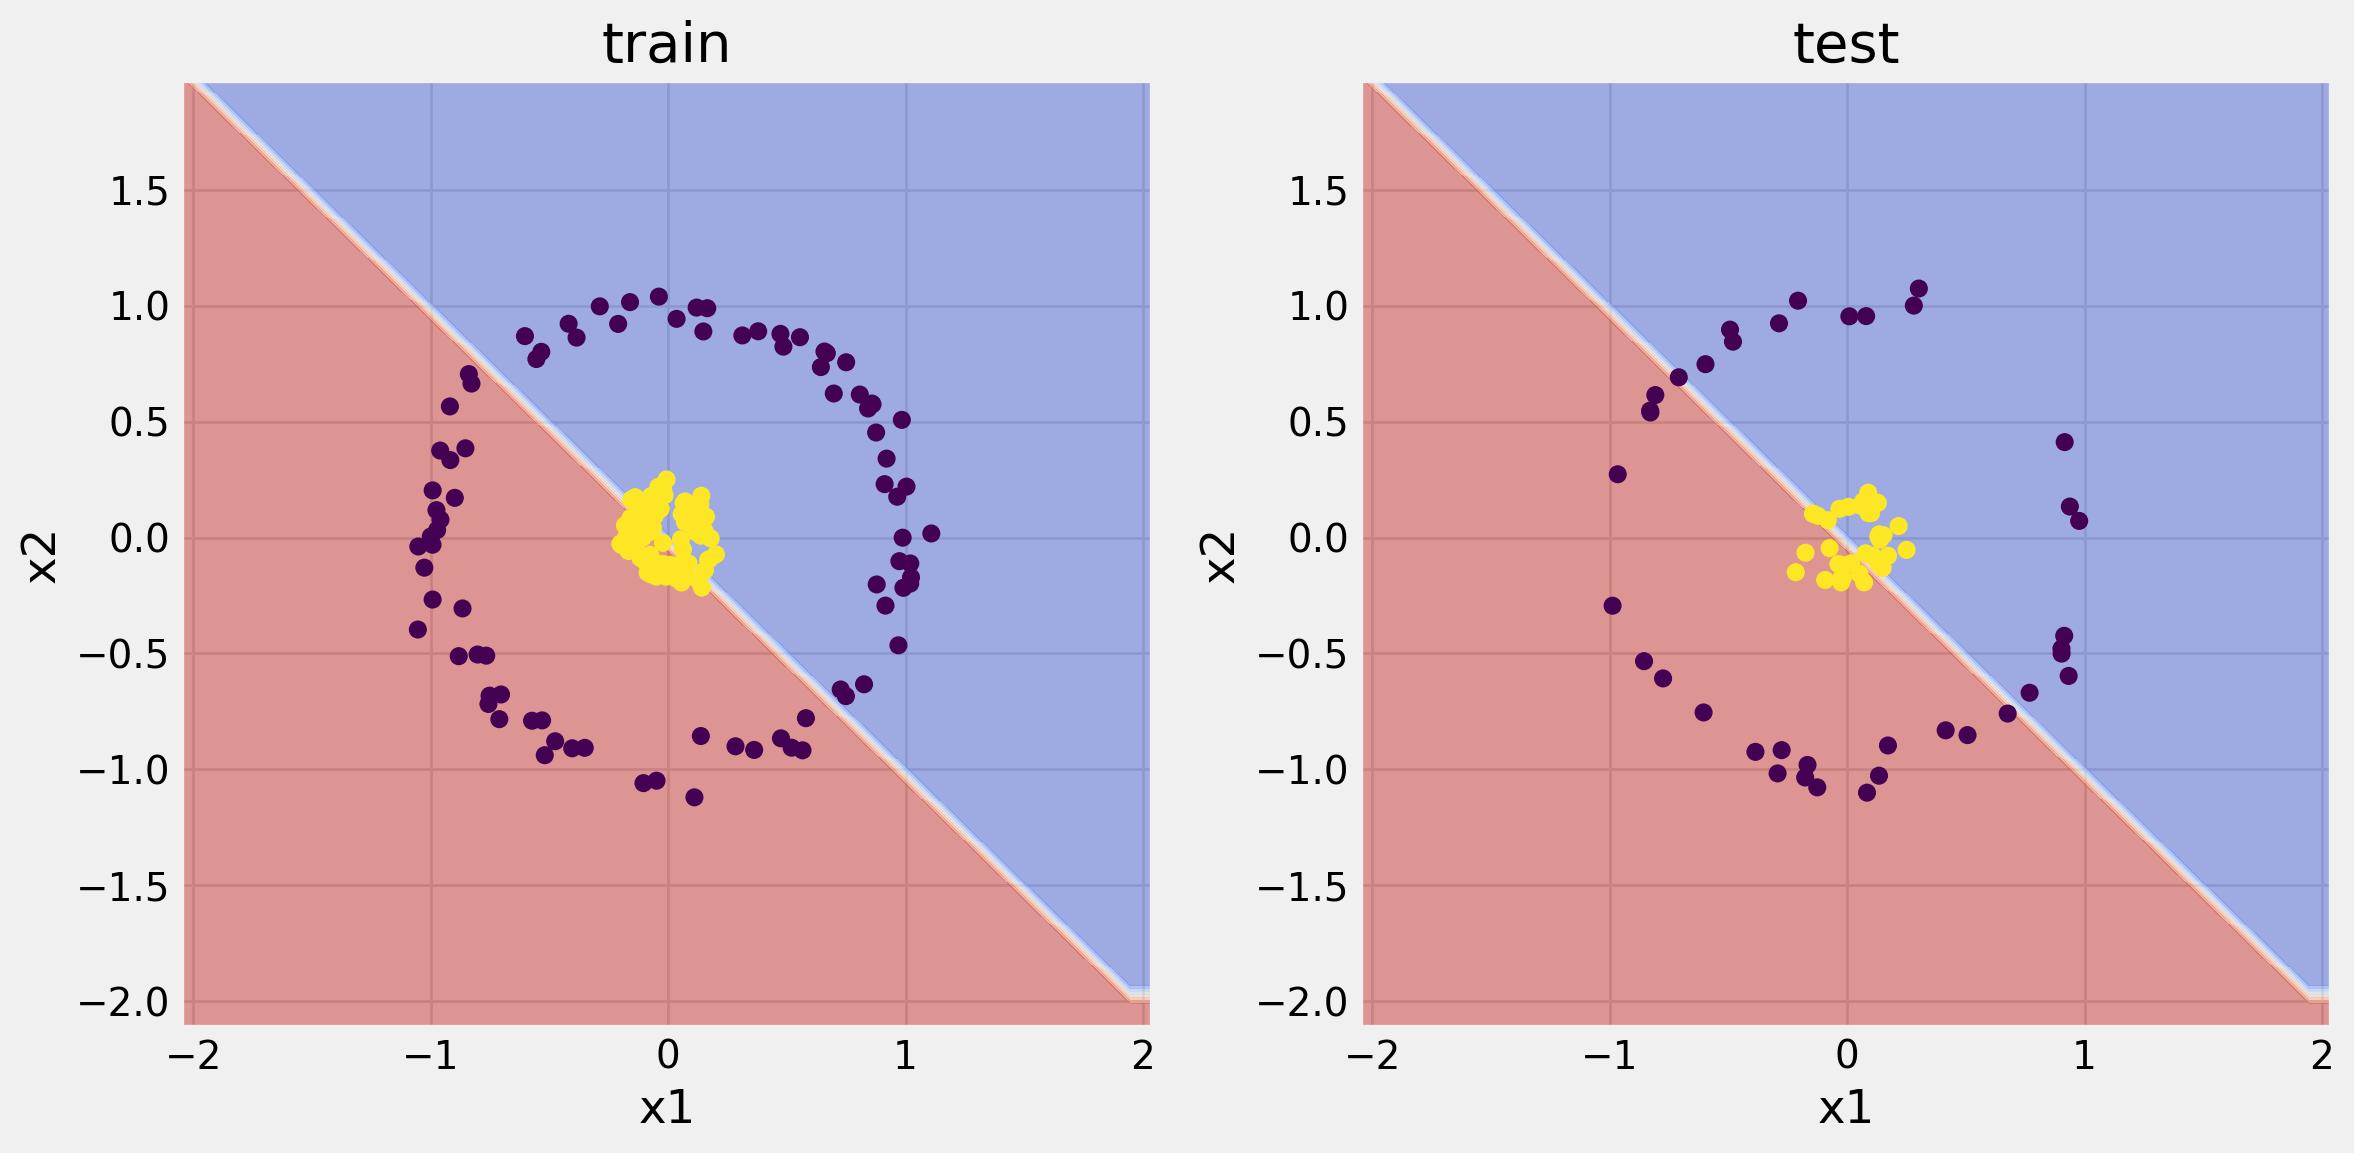

In [41]:
# decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1)
)
zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

f, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].contourf(xx, yy, zz, alpha=0.5, cmap='coolwarm')
axs[0].scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    marker='o',
)
axs[0].set_title("train")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")
axs[1].contourf(xx, yy, zz, alpha=0.5, cmap='coolwarm')
axs[1].scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test,
)
axs[1].set_title("test")
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")
plt.tight_layout()
plt.show()

**comentários**

como um perpectron só vai conseguir aprender relações lineares, o perfil radial dos dados não pode ser "aprendido".

## dataset 2

In [42]:
i = 3
train = pd.read_csv(f"../data/atividade_01/train_dataset{i}.csv")
test = pd.read_csv(f"../data/atividade_01/test_dataset{i}.csv")
display(train.head())
display(test.head())

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,label
0,-0.807620,-1.040725,-0.253056,1.574192,-1.229116,0.341427,-1.076045,0.466442,-2.659222,0.282819,1
1,1.977193,3.098634,-0.655146,1.000131,-0.061258,0.872282,0.222224,-1.371540,1.132539,1.205193,1
2,1.216026,1.148684,0.850773,0.760331,-0.101021,0.929145,-1.084911,0.472061,2.064538,-1.790492,-1
3,-0.059456,-0.324532,-0.197156,0.352045,0.209952,1.096239,-0.029855,-0.561762,-1.852187,-1.582095,-1
4,0.641875,-0.774237,-0.291659,0.570897,-0.038580,0.202788,0.129194,-0.730596,-1.459065,0.672843,1


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,label
0,-0.556450,0.639354,0.548124,-0.055971,-0.646440,-0.342631,0.505927,0.493903,-1.812220,-2.666216,-1
1,-0.817149,-0.263310,-1.899496,0.186711,-1.743077,0.179631,0.976103,0.829244,0.102470,-0.414423,-1
2,-0.798059,-1.834490,0.479166,-0.054388,-0.217921,-0.328427,0.793177,1.162940,-2.254620,-0.294447,1
3,1.969663,-1.076261,-0.127462,0.537670,-0.556573,-1.266192,0.027468,-0.602722,0.782538,1.225436,1
4,0.756249,-0.731699,0.457629,-0.184156,-0.136647,1.090436,0.718500,1.501187,-0.206114,-1.086318,-1


### teste 1

train acc : 0.92
test acc  : 0.87


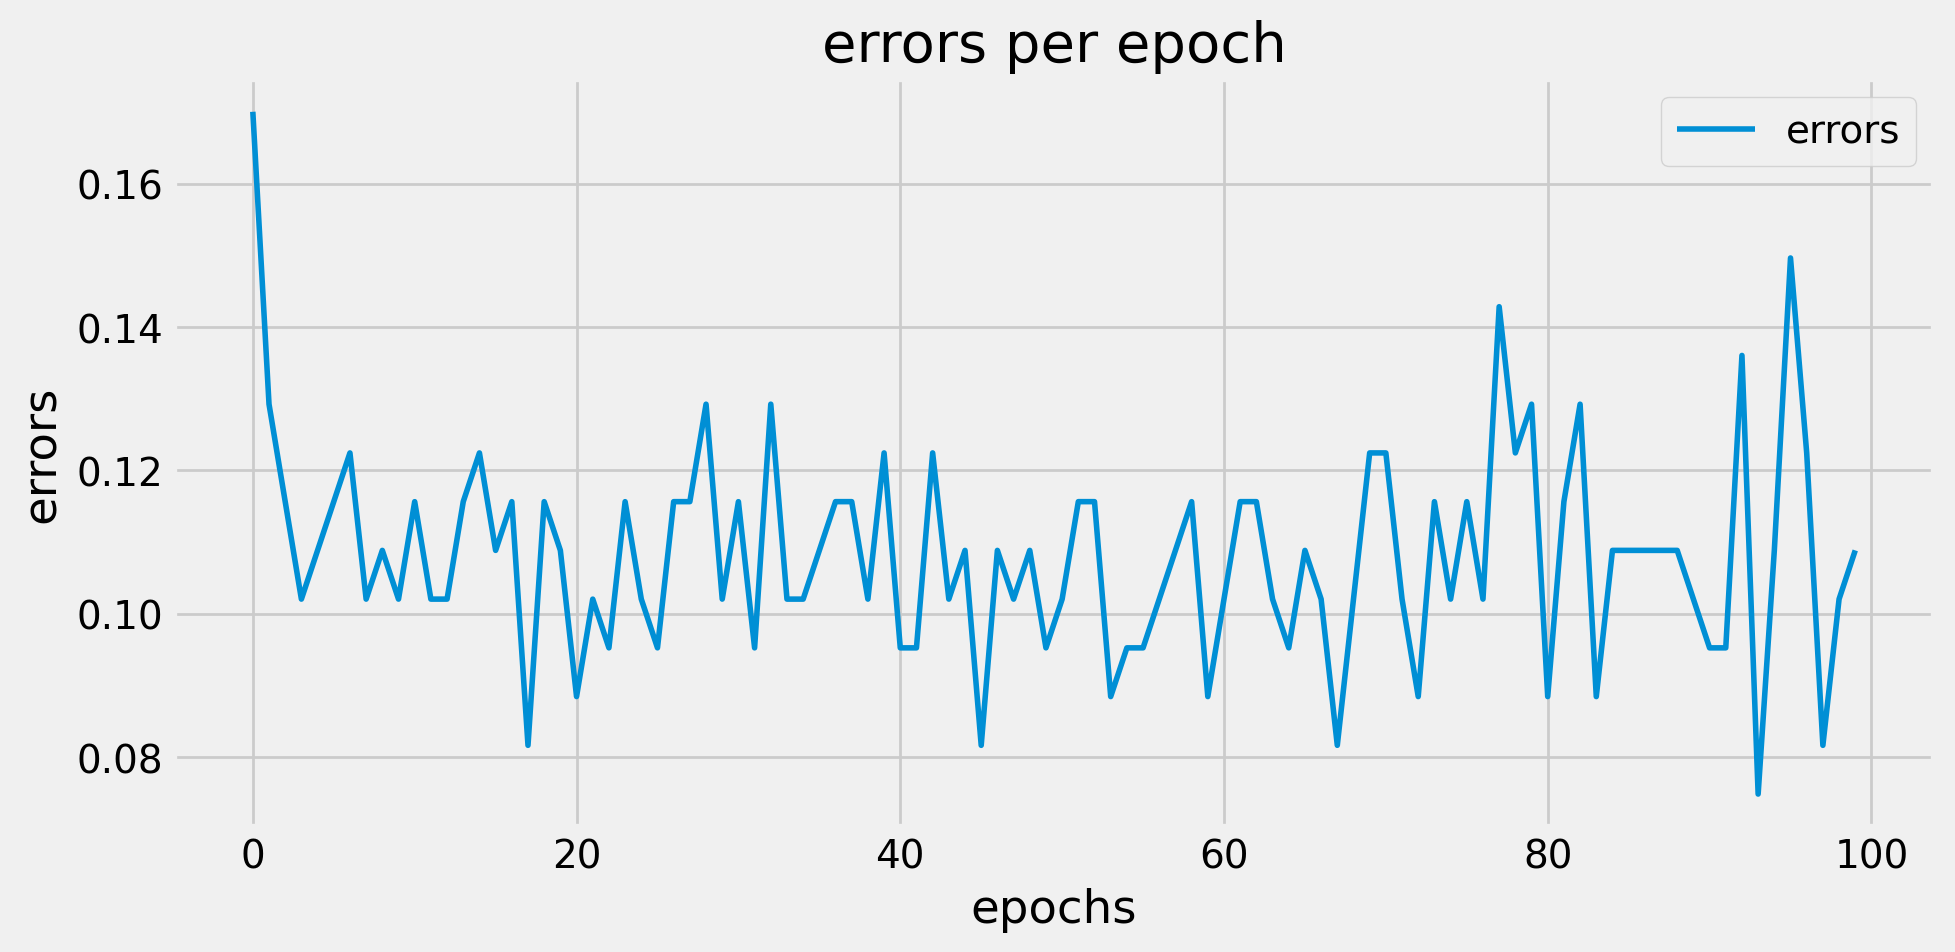

In [43]:
model = Perceptron()

X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

weights, epochs, errors = model.fit(
    X_train,
    y_train,
    num_epochs=100,
    learning_rate=0.1
)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

accuracy_train = np.mean(pred_train == y_train)
accuracy_test = np.mean(pred_test == y_test)

print(f"train acc : {accuracy_train:.2f}")
print(f"test acc  : {accuracy_test:.2f}")

plt.figure(figsize=(10, 5))
plt.plot(errors, label="errors", linewidth=2)
plt.xlabel("epochs")
plt.ylabel("errors")
plt.title("errors per epoch")
plt.legend()
plt.tight_layout()
plt.show()

### teste 2

train acc : 0.92 | test acc  : 0.87 | LR: 0.1 | E: 100 | epochs: 100 | mean errors: 0.11 | std errors: 0.01


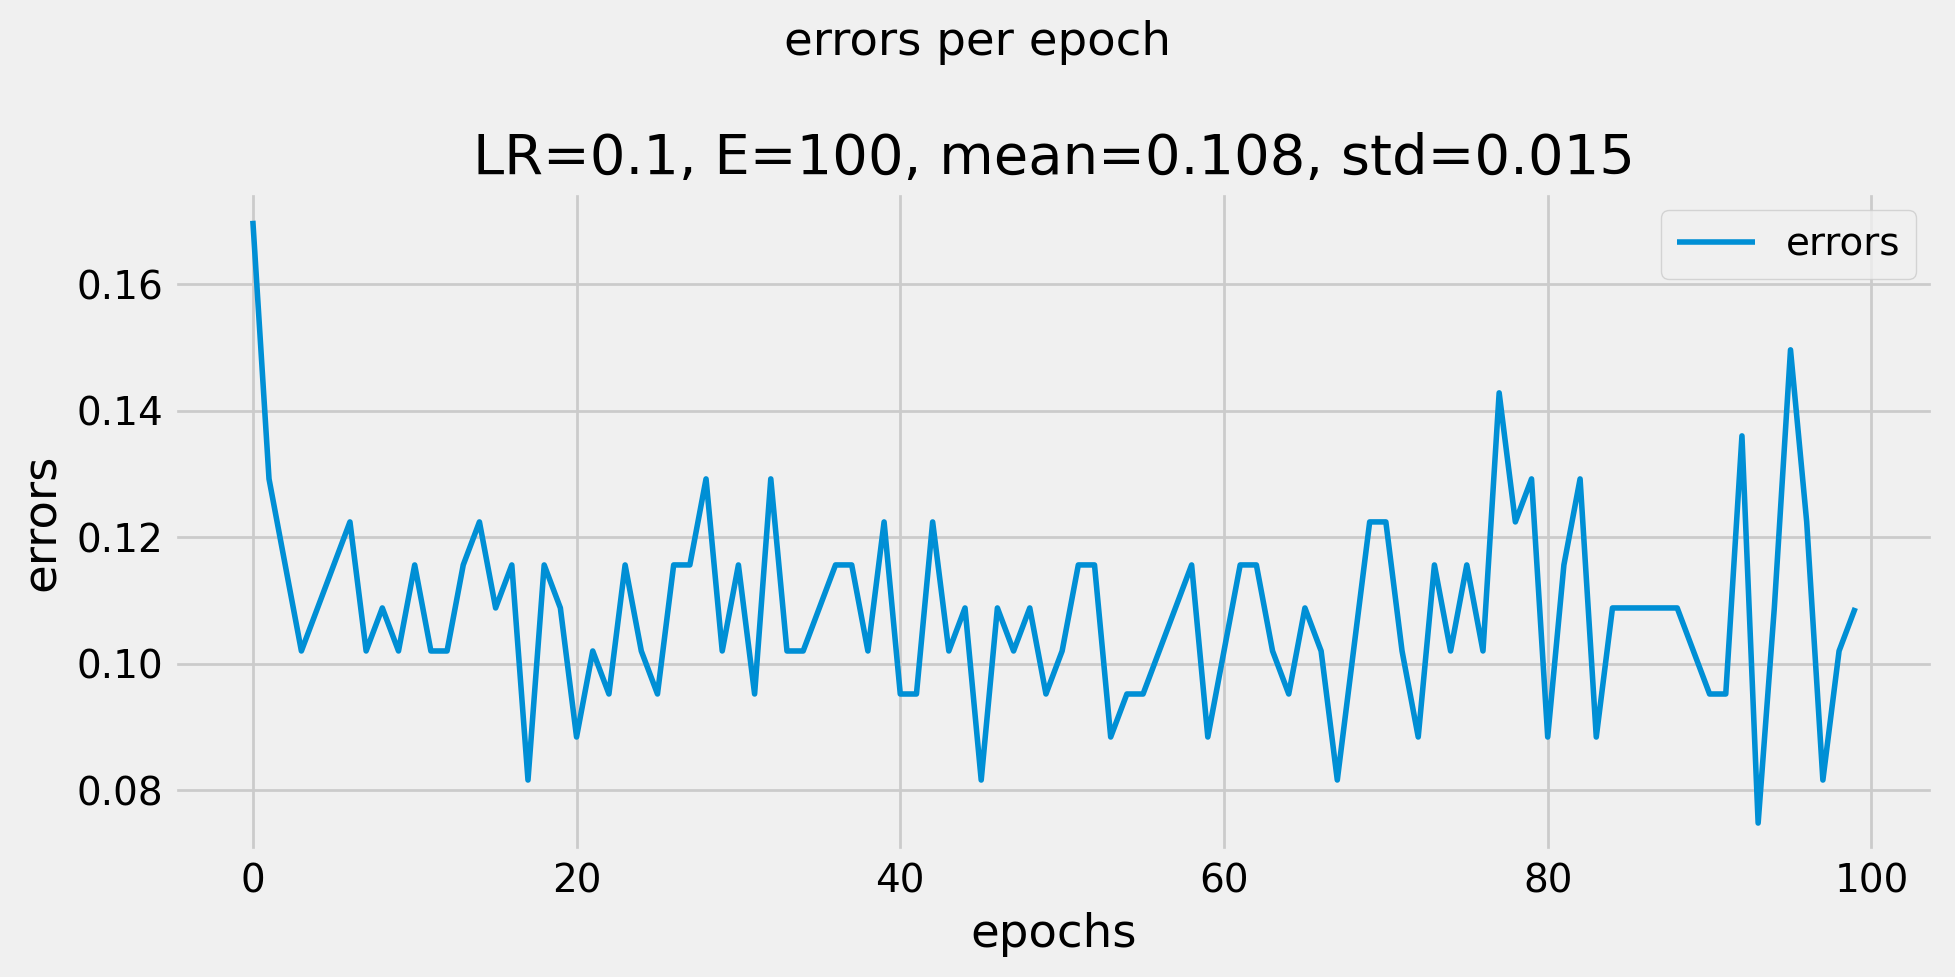

train acc : 0.90 | test acc  : 0.87 | LR: 0.1 | E: 200 | epochs: 200 | mean errors: 0.11 | std errors: 0.01


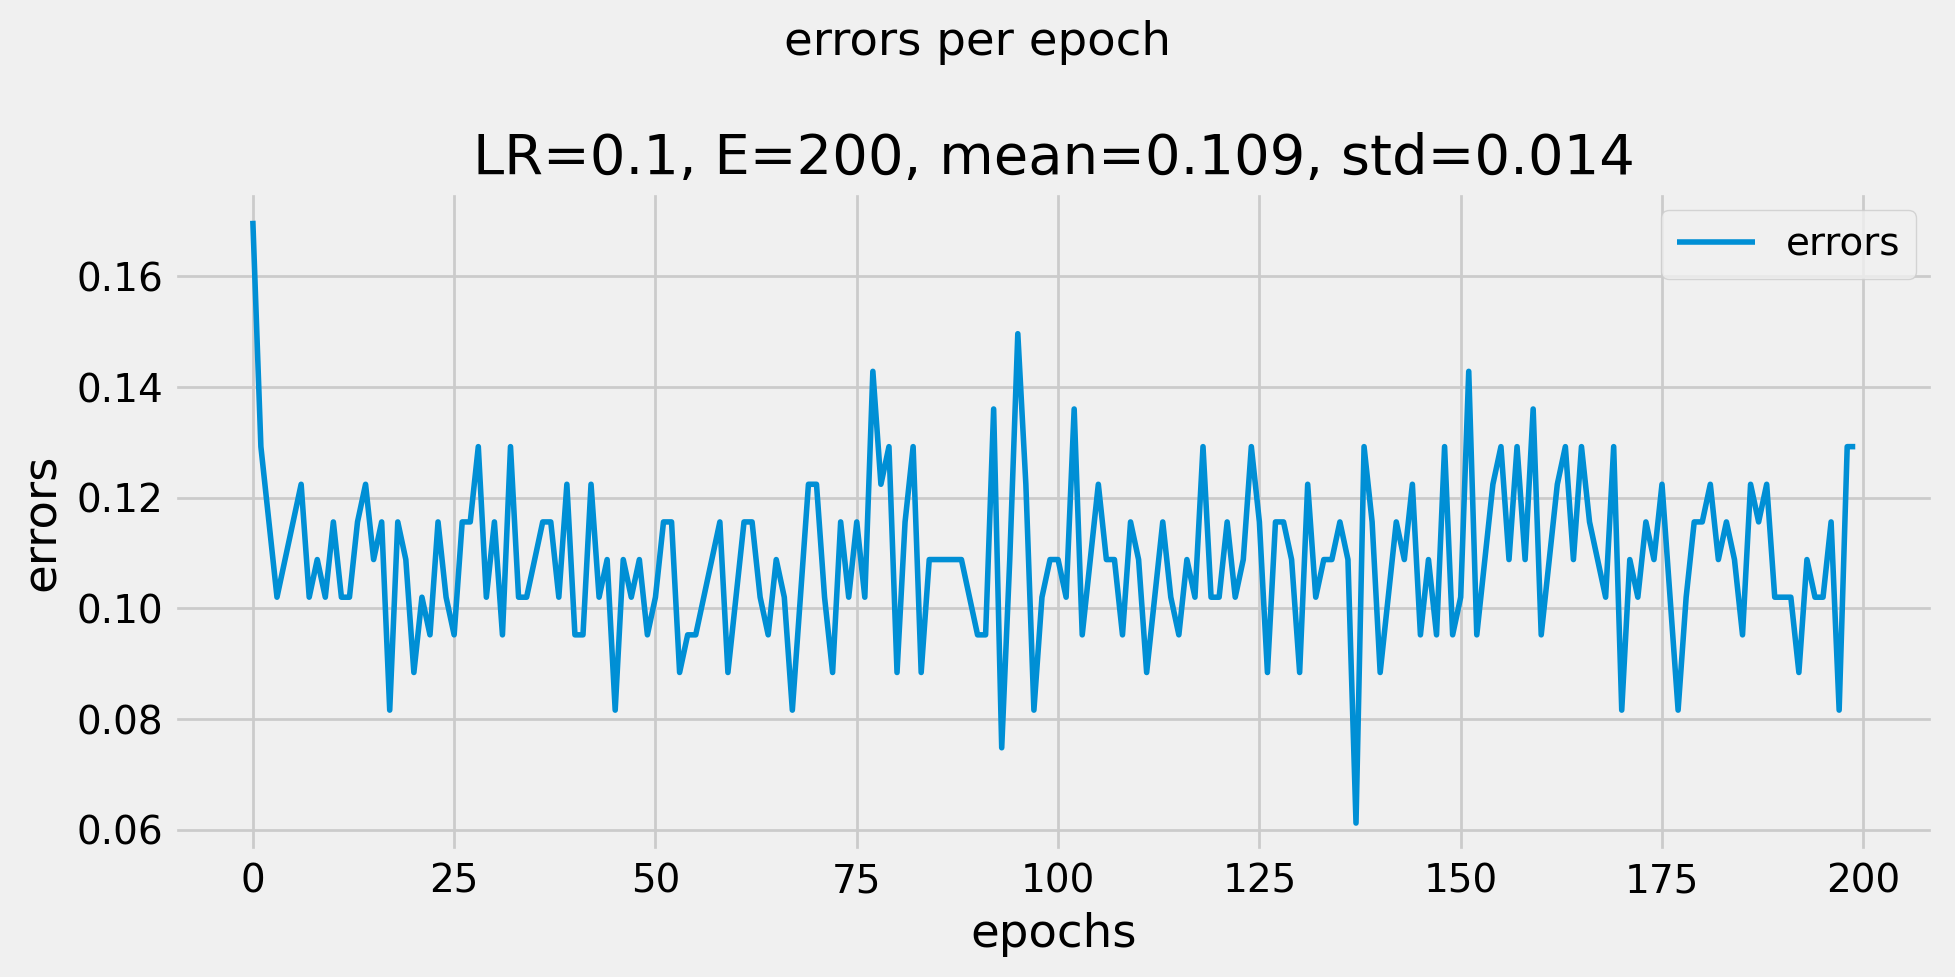

train acc : 0.93 | test acc  : 0.86 | LR: 0.001 | E: 100 | epochs: 100 | mean errors: 0.11 | std errors: 0.01


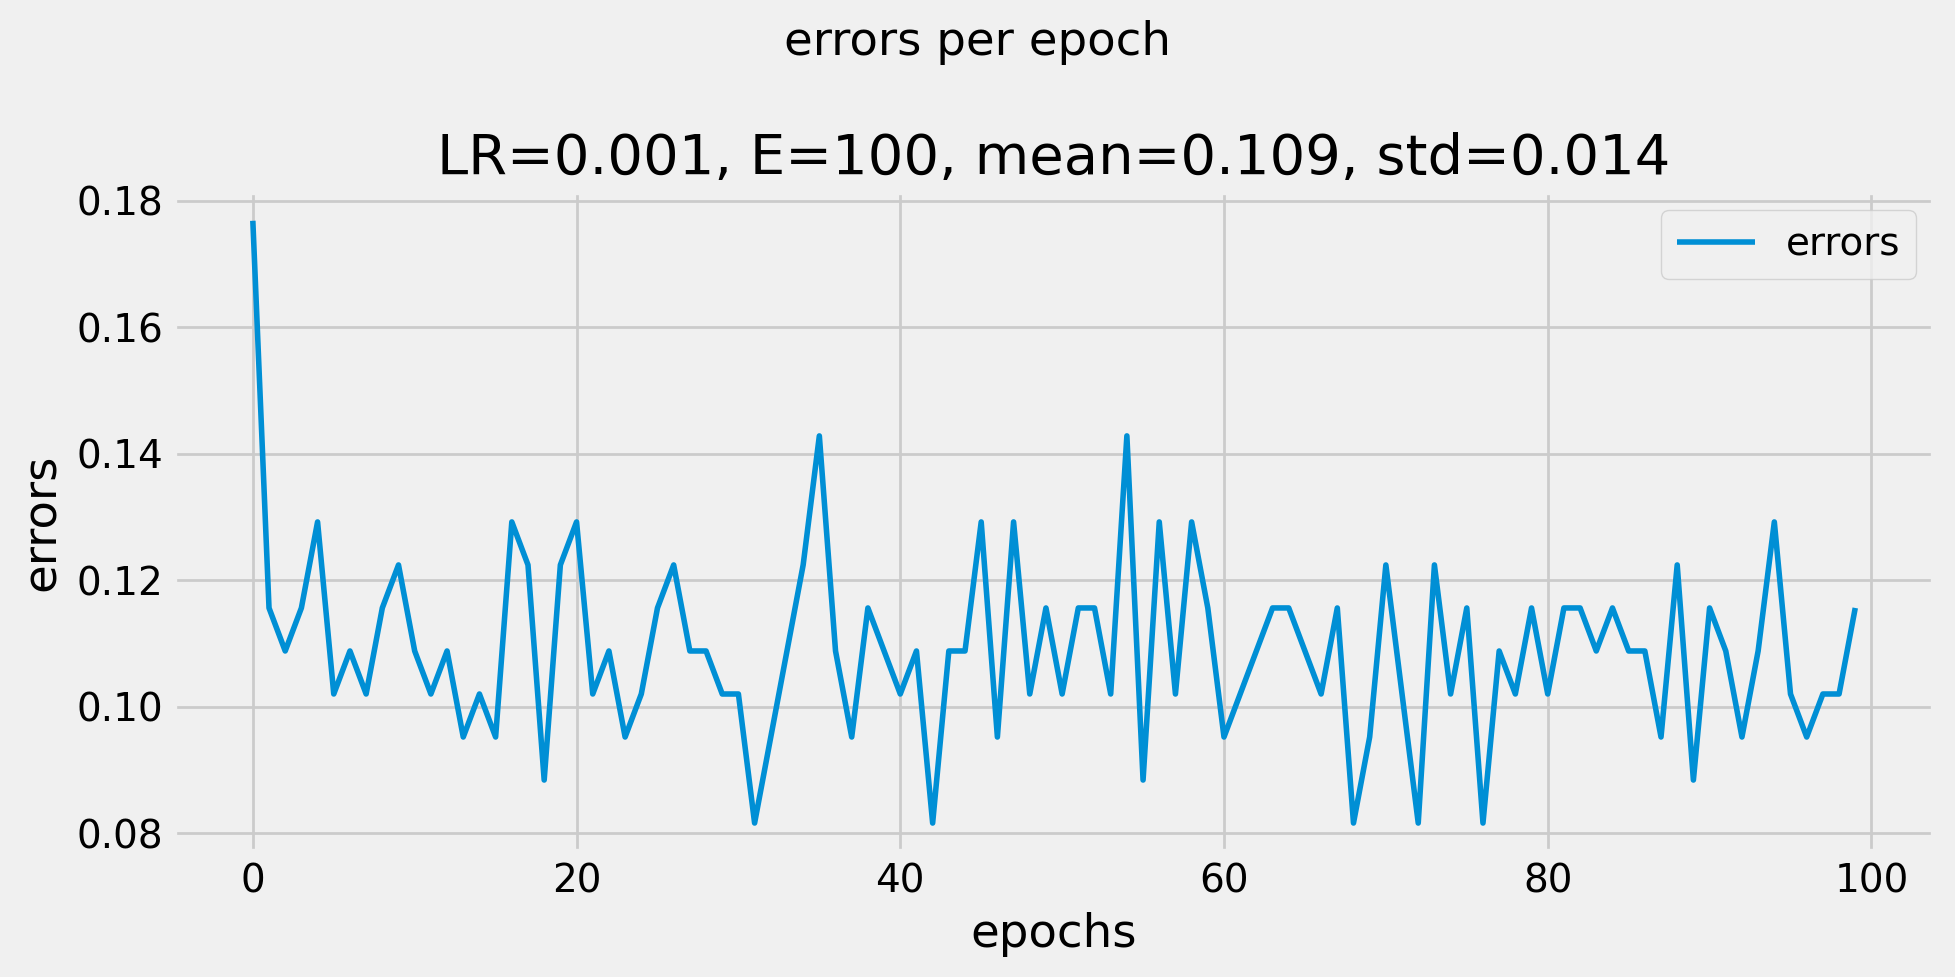

train acc : 0.92 | test acc  : 0.89 | LR: 0.001 | E: 200 | epochs: 200 | mean errors: 0.11 | std errors: 0.01


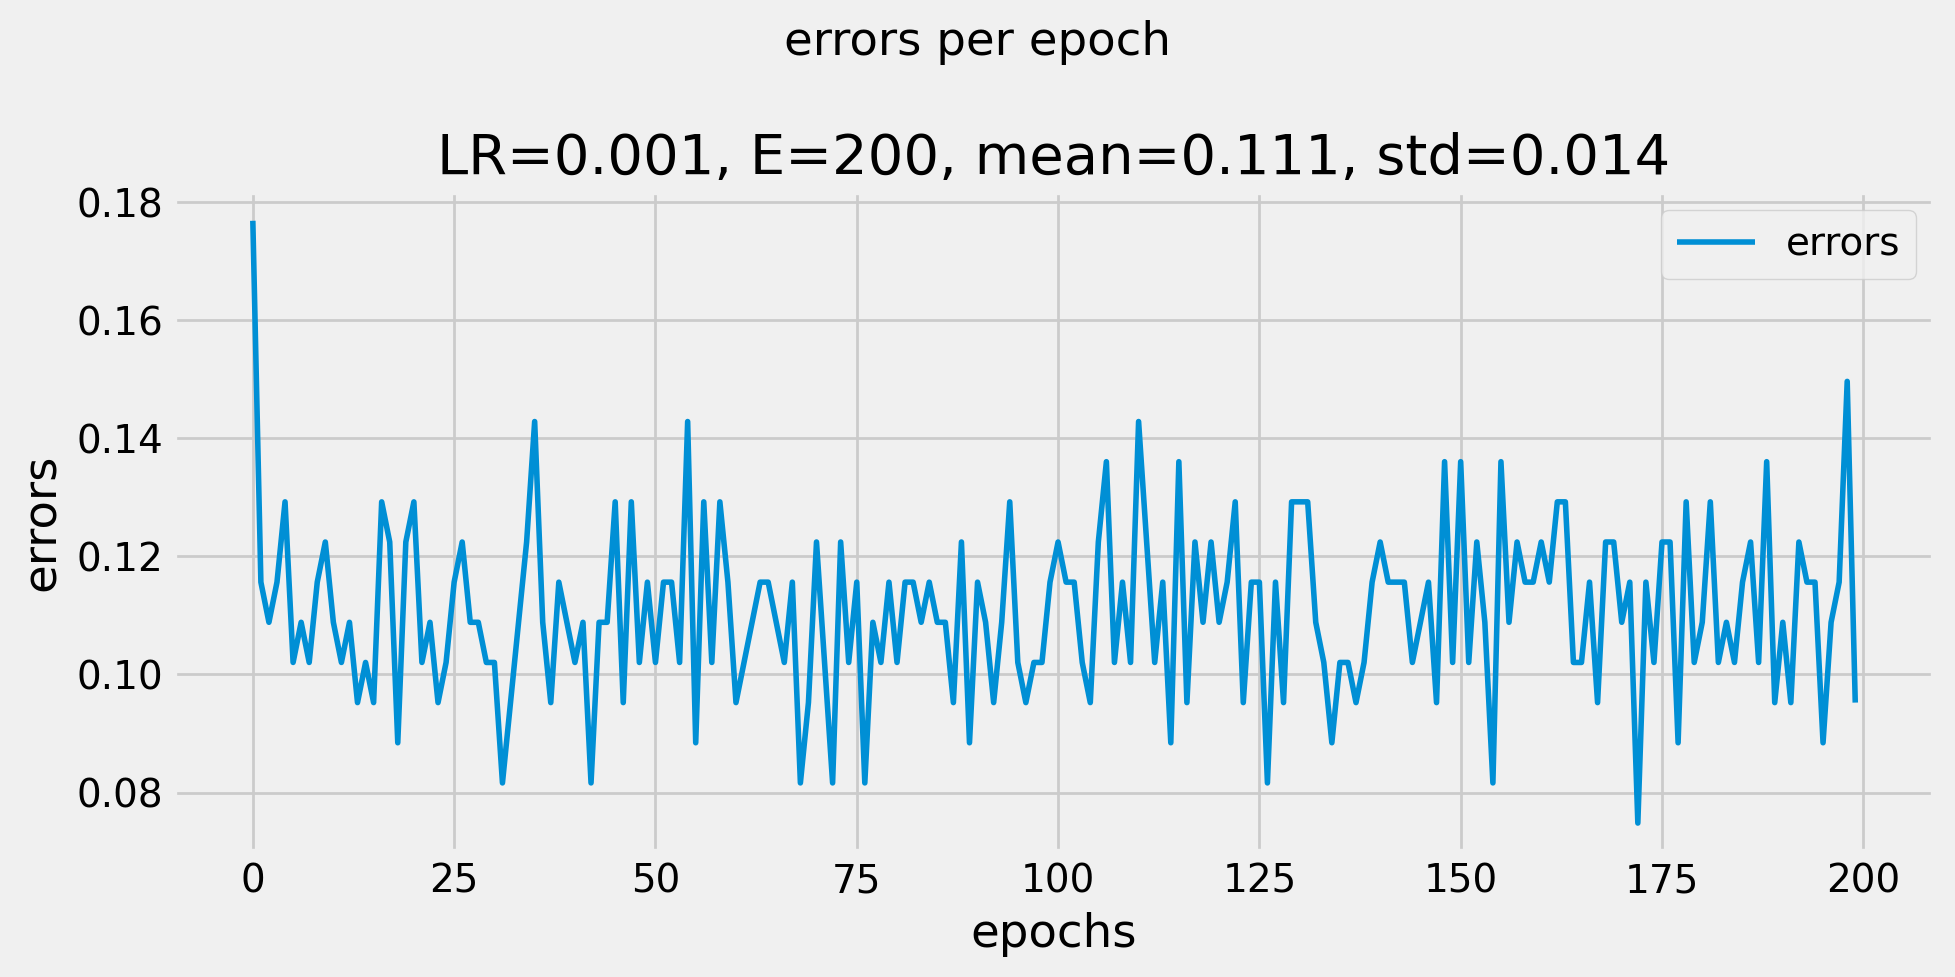

train acc : 0.90 | test acc  : 0.83 | LR: 1e-05 | E: 100 | epochs: 100 | mean errors: 0.11 | std errors: 0.02


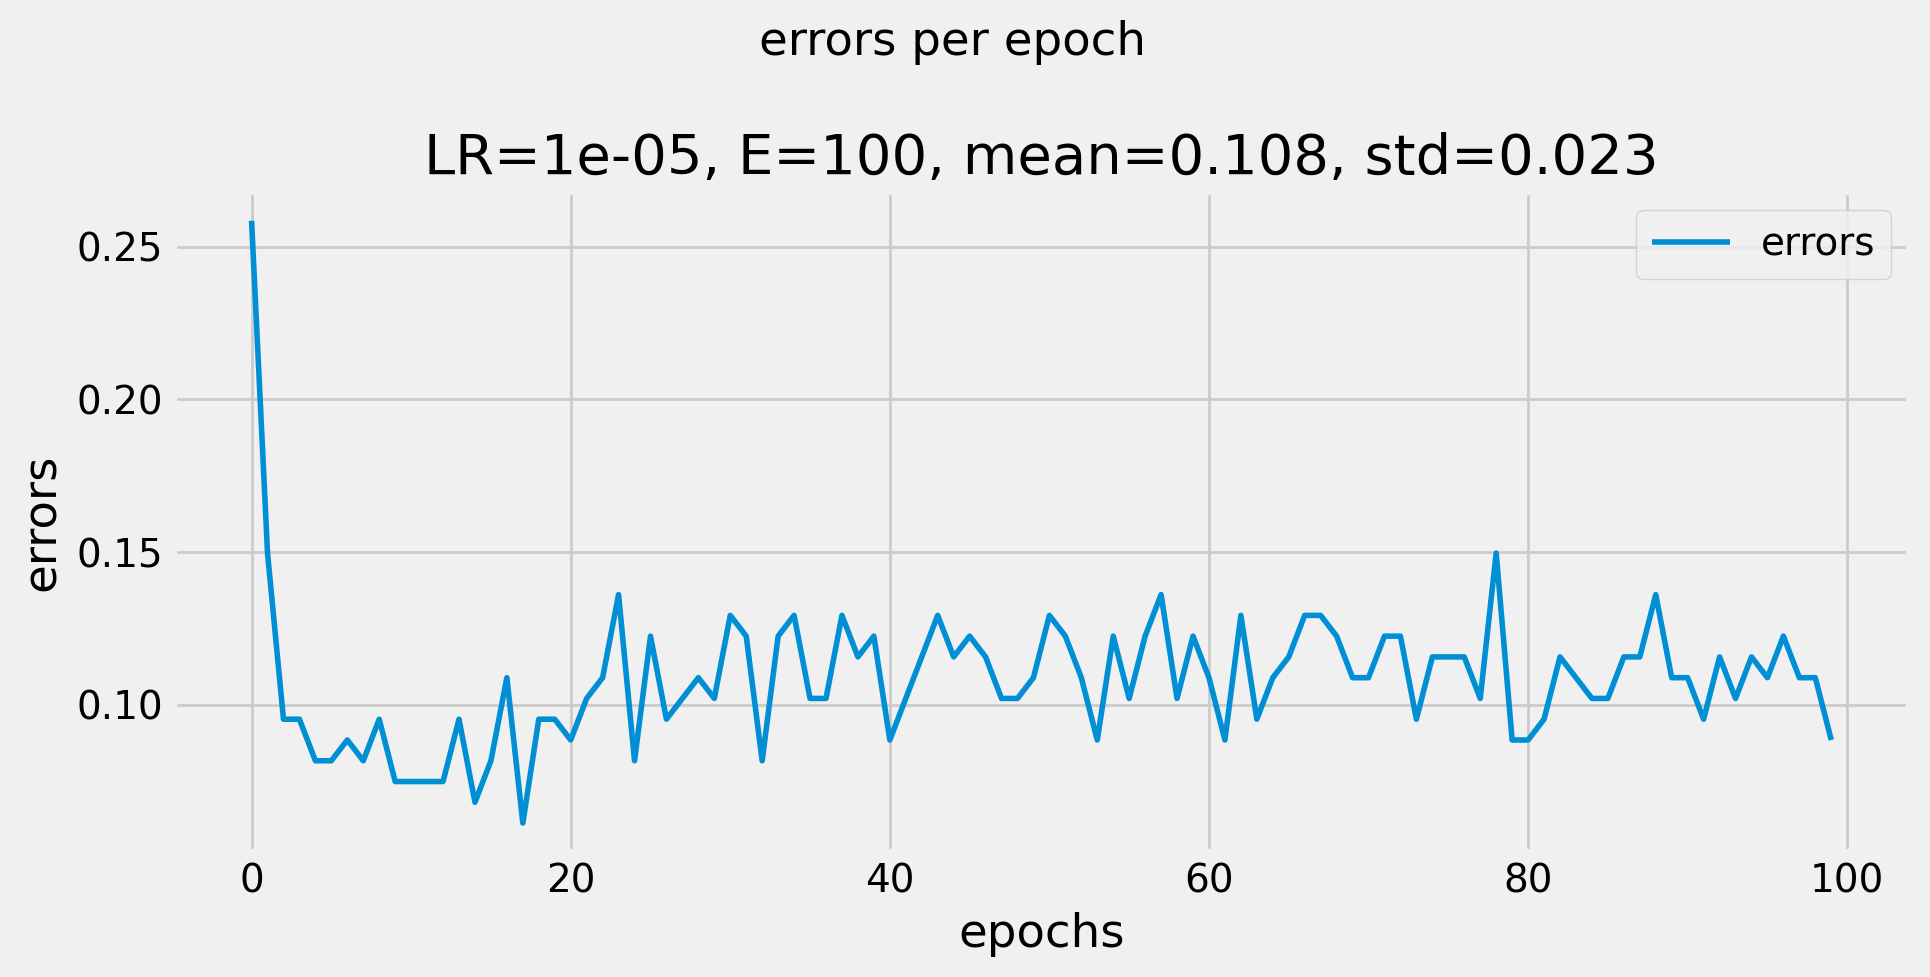

train acc : 0.90 | test acc  : 0.81 | LR: 1e-05 | E: 200 | epochs: 200 | mean errors: 0.11 | std errors: 0.02


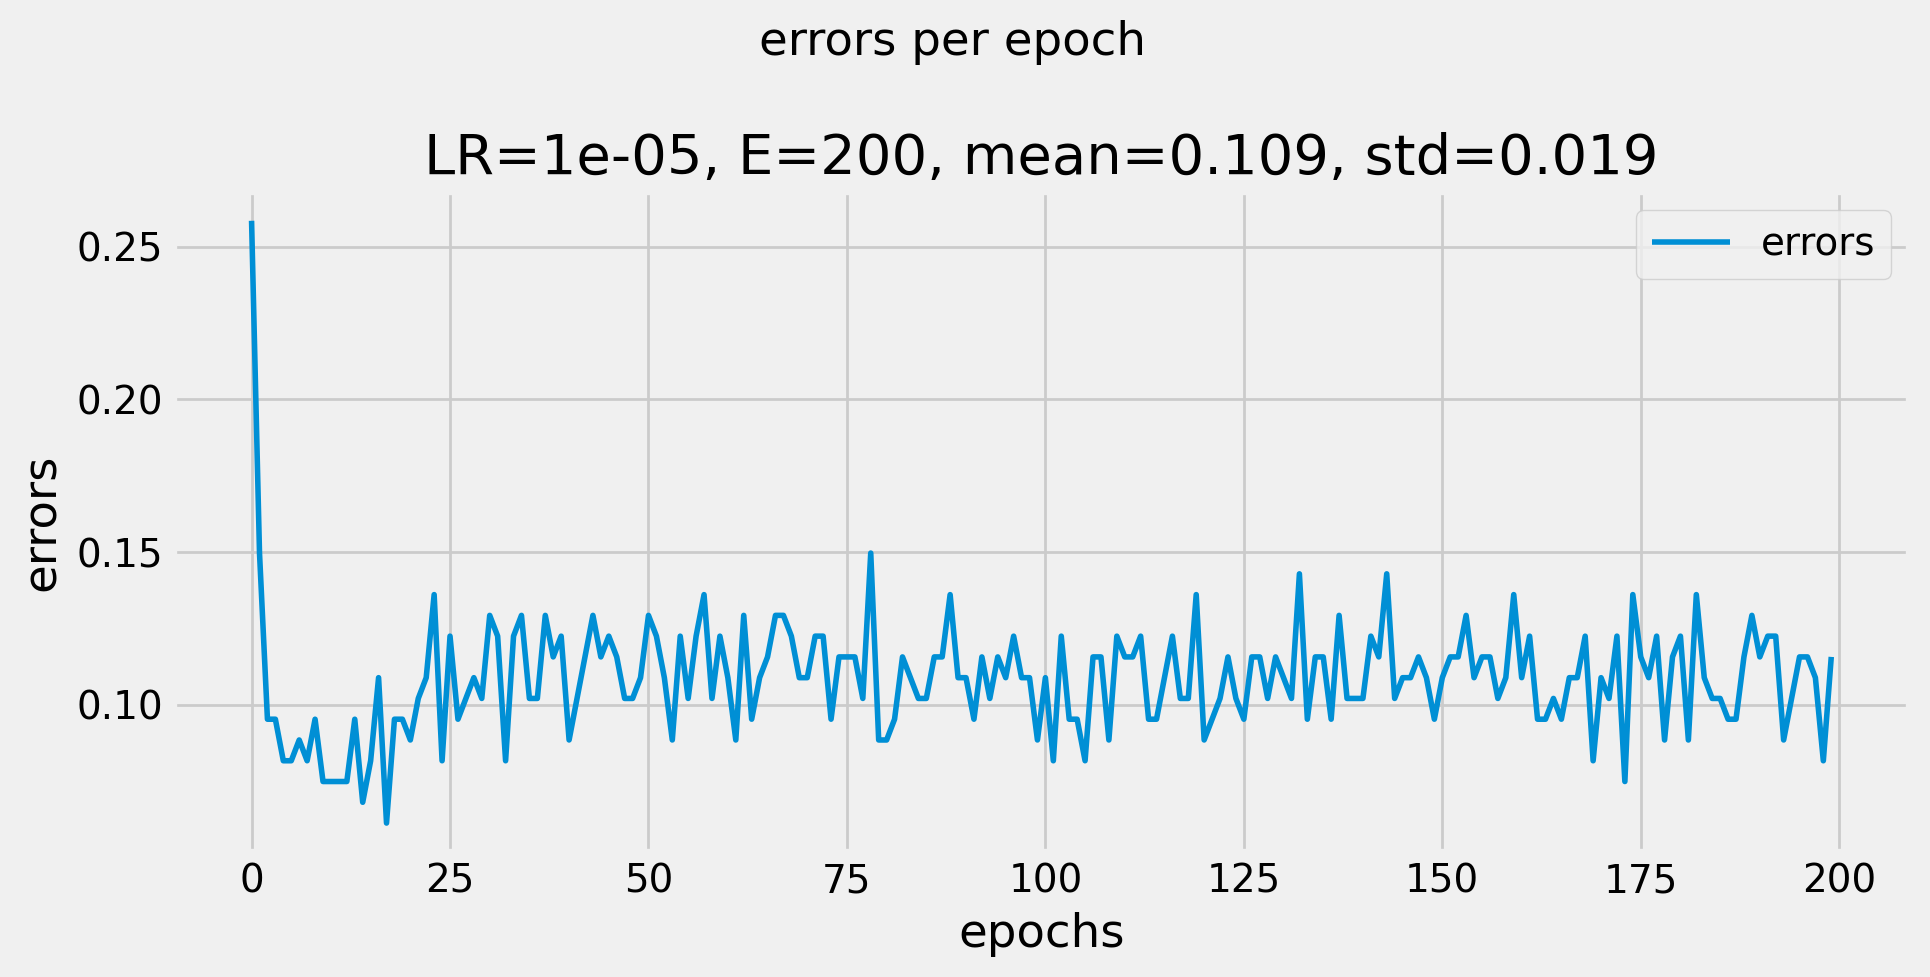

In [51]:
for LR in [1e-1, 1e-3, 1e-5]:
    for E in [100, 200]:
        model = Perceptron()
        weights, epochs, errors = model.fit(
            X_train,
            y_train,
            num_epochs=E,
            learning_rate=LR
        )
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)

        accuracy_train = np.mean(pred_train == y_train)
        accuracy_test = np.mean(pred_test == y_test)

        mean_errors = np.mean(errors)
        std_errors = np.std(errors)

        print(f"train acc : {accuracy_train:.2f} | test acc  : {accuracy_test:.2f} | LR: {LR} | E: {E} | epochs: {epochs} | mean errors: {mean_errors:.2f} | std errors: {std_errors:.2f}")

        plt.figure(figsize=(10, 5))
        plt.plot(errors, label="errors", linewidth=2)
        plt.xlabel("epochs")
        plt.ylabel("errors")
        plt.suptitle("errors per epoch")
        plt.title(f"LR={LR}, E={E}, mean={mean_errors:.3f}, std={std_errors:.3f}")
        plt.legend()
        plt.tight_layout()
        plt.show()        

**comentários**

as estatísticas sobre os erros são invariantes por variação de _learning rate_ e número de épocas, mas é possível notar que a diminuição do learning rate, para esse dataset, faz o erro convergir mais rápido para valores menores de erro no início do treinamento, contudo valores muito pequenos de learning rate não favorecem a generalização do modelo.

.